# Bank Loan Approval Project
Dream housing finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These detials are gender, marital status, education, number of dependants, income, loan amount, credit history and others. To automate the process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. This is a standard supervised classfication task. A classification problem where we have to predict whether a loan would be approved or not. 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [ ]:
# getting the train and test datasets 
train = pd.read_csv('/content/drive/My Drive/Projects/Bank Loan Approval/train.csv')
test = pd.read_csv('/content/drive/My Drive/Projects/Bank Loan Approval/test.csv')

## Exploratory Data Analysis

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
# finding the value counts for the train dataset
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Preprocessing both datatsets

In [ ]:
# combining the train and test datatsets
dataset = [train, test]

In [ ]:
# dropping loan ID column as it is not usefull in model training 
for data in dataset :
  data.drop(['Loan_ID'], axis = 1, inplace = True)

In [ ]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
# replacing the null values in numerical columns with their mean
dataset = [train, test]
for data in dataset :
  data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
  data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [ ]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# replacing the null values in categorical columns using backward and forward fill
dataset = [train, test]
for data in dataset :
  data['Credit_History'].ffill(inplace = True)
  data['Gender'].ffill(inplace = True)
  data['Dependents'].ffill(inplace = True)
  data['Self_Employed'].bfill(inplace = True)
  data['Married'].ffill(inplace = True)
  data['Credit_History'].ffill(inplace = True)

In [ ]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# checking the value counts for all categorical variables
print(train['Gender'].value_counts())
print(train['Married'].value_counts())
print(train['Credit_History'].value_counts())
print(train['Self_Employed'].value_counts())
print(train['Dependents'].value_counts())

Male      500
Female    114
Name: Gender, dtype: int64
Yes    400
No     214
Name: Married, dtype: int64
1.0    513
0.0    101
Name: Credit_History, dtype: int64
No     528
Yes     86
Name: Self_Employed, dtype: int64
0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64


## Correlation and Univariate Analysis
Checking the count observations of all categorical variables against the target variable

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


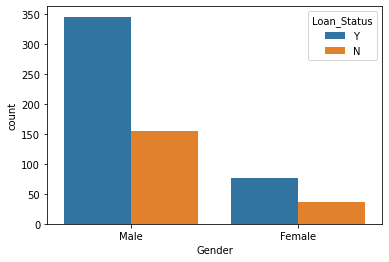

In [ ]:
sns.countplot(train['Gender'], hue = train['Loan_Status'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


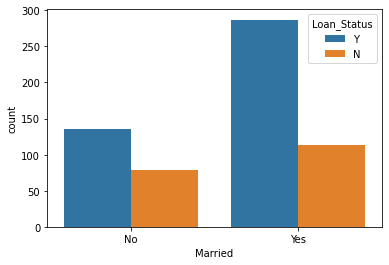

In [ ]:
sns.countplot(train['Married'], hue = train['Loan_Status'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


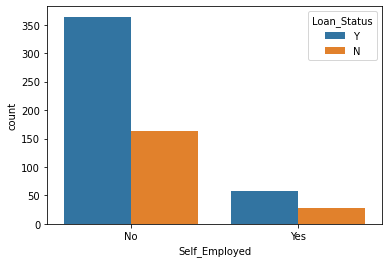

In [ ]:
sns.countplot(train['Self_Employed'], hue = train['Loan_Status'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


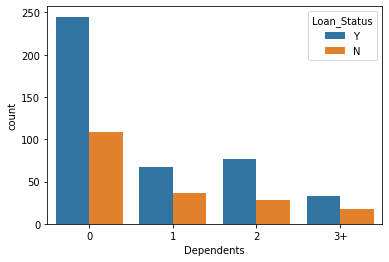

In [ ]:
sns.countplot(train['Dependents'], hue = train['Loan_Status'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


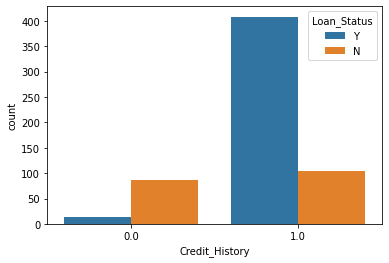

In [ ]:
sns.countplot(train['Credit_History'], hue = train['Loan_Status'])

Checking the skewness of all the numercial variables

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


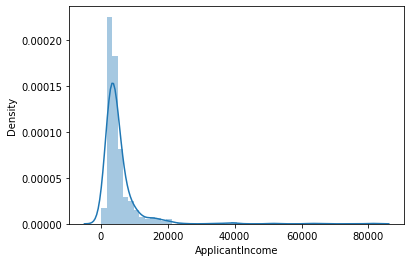

In [ ]:
sns.distplot(train['ApplicantIncome'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


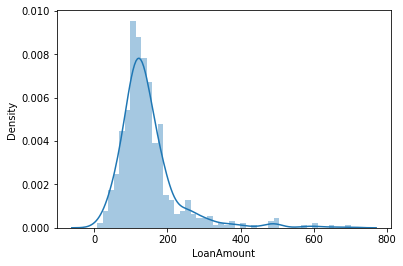

In [ ]:
sns.distplot(train['LoanAmount'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


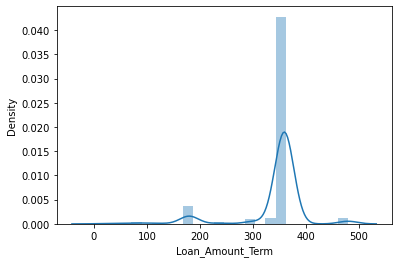

In [ ]:
sns.distplot(train['Loan_Amount_Term'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


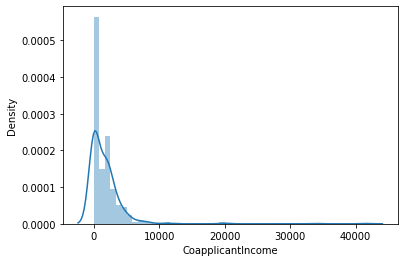

In [ ]:
sns.distplot(train['CoapplicantIncome'])

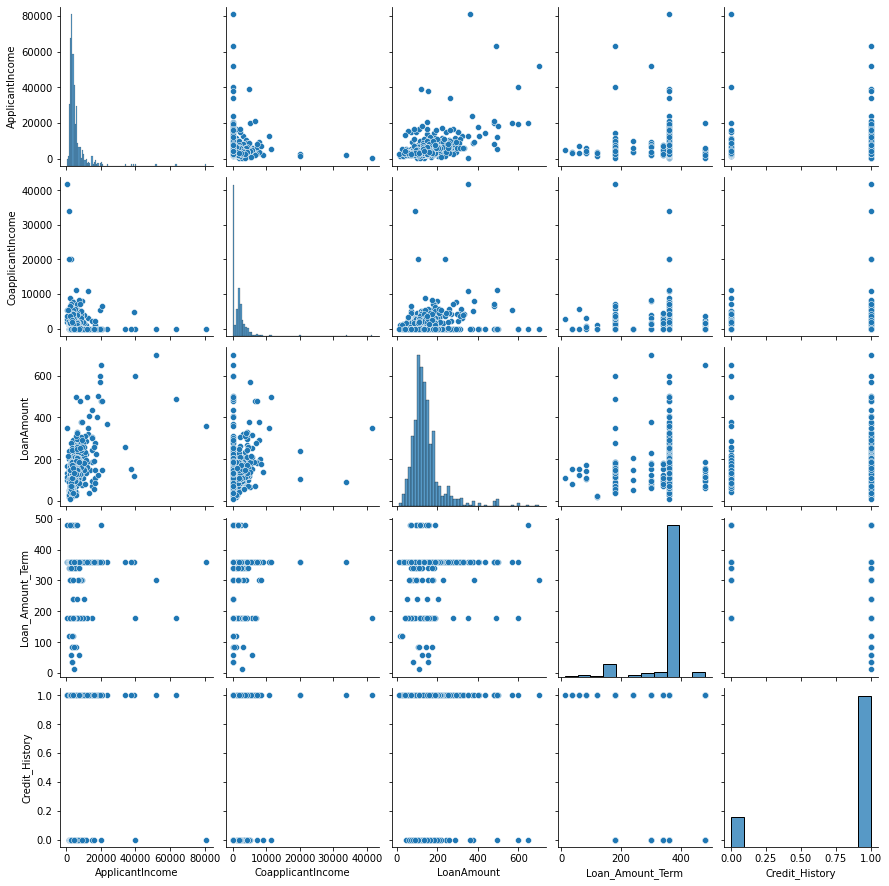

In [ ]:
# using pairplot to see both distribution of single variables and relationship between 2 variables 
# and afterwards identify trends for follow-up analysis 
sns.pairplot(data=train)

In [ ]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


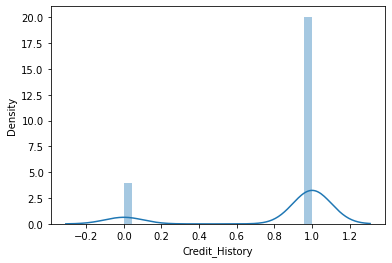

In [ ]:
sns.distplot(train['Credit_History'])

Using numpy to change left or right skewed into a normal distribution for best model fitting

In [ ]:
dataset = [train, test]
for data in dataset :
  data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
  data['CoapplicantIncome'] = np.log(data['CoapplicantIncome'])
  data['LoanAmount'] = np.log(data['LoanAmount'])
  data['Loan_Amount_Term'] = np.log(data['Loan_Amount_Term'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


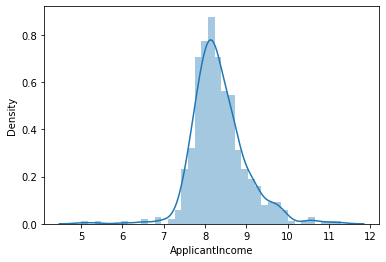

In [ ]:
sns.distplot(train['ApplicantIncome'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


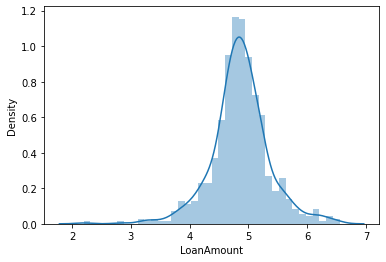

In [ ]:
sns.distplot(train['LoanAmount'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


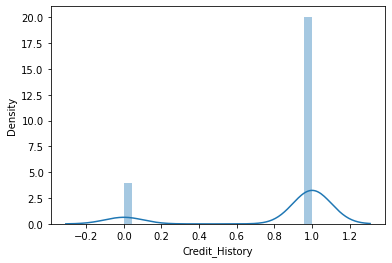

In [ ]:
sns.distplot(train['Credit_History'])

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,8.341213,-inf,4.862066,5.802065,0.835505
std,0.645263,NaN,0.496575,0.312482,0.371027
min,5.010635,-inf,2.197225,2.484907,0.000000
25%,7.964677,-inf,4.607658,5.886104,1.000000
50%,8.246040,7.080284,4.859812,5.886104,1.000000
75%,8.664750,7.739462,5.104426,5.886104,1.000000
max,11.302204,10.637465,6.551080,6.173786,1.000000


In [ ]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,-inf,-inf,4.828181,5.795568,0.833787
std,NaN,NaN,0.416311,0.382451,0.372780
min,-inf,-inf,3.332205,1.791759,0.000000
25%,7.959974,-inf,4.615121,5.886104,1.000000
50%,8.239065,6.932448,4.836282,5.886104,1.000000
75%,8.529122,7.795837,5.059420,5.886104,1.000000
max,11.191742,10.085809,6.309918,6.173786,1.000000


In [ ]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,-inf,4.986426,5.886104,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,-inf,4.189655,5.886104,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,-inf,4.948760,5.886104,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,-inf,4.262680,5.886104,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320205,-inf,3.688879,5.192957,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8.996157,5.480639,5.533389,5.886104,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,8.933664,-inf,5.231109,5.886104,1.0,Urban,Y


After removing the skewness form the data we see that the Coapplicant Income column shows many infinite values which can cause problems in our model training. so we will drop that column form both test and train datasets.

In [ ]:
train.drop(['CoapplicantIncome'], axis = 1, inplace=True)
test.drop(['CoapplicantIncome'], axis = 1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   ApplicantIncome   614 non-null    float64
 6   LoanAmount        614 non-null    float64
 7   Loan_Amount_Term  614 non-null    float64
 8   Credit_History    614 non-null    float64
 9   Property_Area     614 non-null    object 
 10  Loan_Status       614 non-null    object 
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            367 non-null    object 
 1   Married           367 non-null    object 
 2   Dependents        367 non-null    object 
 3   Education         367 non-null    object 
 4   Self_Employed     367 non-null    object 
 5   ApplicantIncome   367 non-null    float64
 6   LoanAmount        367 non-null    float64
 7   Loan_Amount_Term  367 non-null    float64
 8   Credit_History    367 non-null    float64
 9   Property_Area     367 non-null    object 
dtypes: float64(4), object(6)
memory usage: 28.8+ KB


## Checking the Correlation
If 2 variables are highly correlated with each other, then we can drop one column and keep the other one for the model.

For high correlation, the value should be as close to 1 as possible.




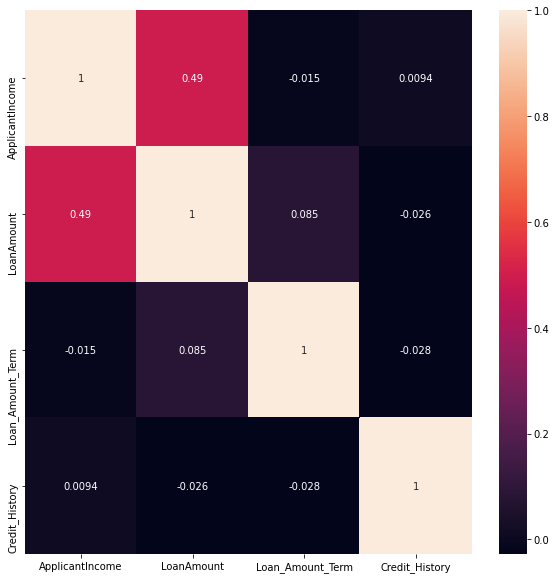

In [ ]:
corr = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, annot=True)

## Label Encoding 
To analyze data the data we convert all categorical data into numerical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = ['Gender', 'Dependents', 'Married', 'Self_Employed', 'Property_Area', 'Education']
label = LabelEncoder()
dataset = [train, test]
print('label encoding success')

label encoding success


In [ ]:
# using the fit-transform which works in 2 steps :
# initial fitting of parameters in the training set x
# also returns a transformed x'
for data in dataset :
  for c in columns :
    data[c] = label.fit_transform(data[c])
print('fit-transform successful')    

fit-transform successful


In [ ]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,8.651724,4.700480,5.886104,1.0,2
1,1,1,1,0,0,8.031385,4.836282,5.886104,1.0,2
2,1,1,2,0,0,8.517193,5.337538,5.886104,1.0,2
3,1,1,2,0,0,7.757906,4.605170,5.886104,1.0,2
4,1,0,0,1,0,8.094378,4.356709,5.886104,1.0,2
...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,8.296297,4.727388,5.886104,1.0,2
363,1,1,0,0,0,8.332789,4.744932,5.886104,1.0,2
364,1,0,0,0,0,8.086410,4.836282,5.886104,1.0,1
365,1,1,0,0,0,8.517193,5.062595,5.886104,1.0,0


In [ ]:
# as there is no dependent variable (Loan_status) in test dataset so we will encode it seperately for the train data
train['Loan_Status'] = label.fit_transform(train['Loan_Status'])

In [ ]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,4.986426,5.886104,1.0,2,1
1,1,1,1,0,0,8.430109,4.852030,5.886104,1.0,0,0
2,1,1,0,0,1,8.006368,4.189655,5.886104,1.0,2,1
3,1,1,0,1,0,7.856707,4.787492,5.886104,1.0,2,1
4,1,0,0,0,0,8.699515,4.948760,5.886104,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,4.262680,5.886104,1.0,0,1
610,1,1,3,0,0,8.320205,3.688879,5.192957,1.0,0,1
611,1,1,1,0,0,8.996157,5.533389,5.886104,1.0,2,1
612,1,1,2,0,0,8.933664,5.231109,5.886104,1.0,2,1


By looking at the above dataset, the credit history column has float values like 1.0 and 0.0 which needs to be convertd into int values.

In [ ]:
train['Credit_History'].value_counts()

1.0    513
0.0    101
Name: Credit_History, dtype: int64

In [ ]:
# float to int conversion : 1.0 to 1
train['Credit_History'] = train['Credit_History'].astype(dtype = 'Int64')
test['Credit_History'] = test['Credit_History'].astype(dtype = 'Int64')
print('Conversion success')

Conversion success


In [ ]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,4.986426,5.886104,1,2,1
1,1,1,1,0,0,8.430109,4.852030,5.886104,1,0,0
2,1,1,0,0,1,8.006368,4.189655,5.886104,1,2,1
3,1,1,0,1,0,7.856707,4.787492,5.886104,1,2,1
4,1,0,0,0,0,8.699515,4.948760,5.886104,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,4.262680,5.886104,1,0,1
610,1,1,3,0,0,8.320205,3.688879,5.192957,1,0,1
611,1,1,1,0,0,8.996157,5.533389,5.886104,1,2,1
612,1,1,2,0,0,8.933664,5.231109,5.886104,1,2,1


In [ ]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,8.651724,4.700480,5.886104,1,2
1,1,1,1,0,0,8.031385,4.836282,5.886104,1,2
2,1,1,2,0,0,8.517193,5.337538,5.886104,1,2
3,1,1,2,0,0,7.757906,4.605170,5.886104,1,2
4,1,0,0,1,0,8.094378,4.356709,5.886104,1,2
...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,8.296297,4.727388,5.886104,1,2
363,1,1,0,0,0,8.332789,4.744932,5.886104,1,2
364,1,0,0,0,0,8.086410,4.836282,5.886104,1,1
365,1,1,0,0,0,8.517193,5.062595,5.886104,1,0


## Train - Test split

In [ ]:
# train datatset currently in tabular form is converted itno array form for model training 
# : for all rows
# 0:10 for all columns till the 9th one
x = train.iloc[:,0:10].values

In [ ]:
# assigning the dependent variable to y which is the Loan_Status column
# : for all rows
# :10 selects only the last column
y = train.iloc[:,10].values

In [ ]:
y.shape

(614,)

In [ ]:
x.shape

(614, 10)

In [ ]:
# checking for infinite values 
test.loc[test['ApplicantIncome'] == -np.inf]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
25,1,0,0,0,0,-inf,4.997212,5.886104,0,0
116,0,0,0,1,0,-inf,5.192957,5.886104,1,1


In [ ]:
# Replacing the inf values with NAN values
test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# dropping the null values in the test dataset 
test.dropna(inplace=True)

## Model Training 

In [ ]:
# using logistic regression first and then KNN algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# checking accuracy with Logistic regression first
logreg = LogisticRegression()
logreg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_test_pred = logreg.predict(test.values)
y_train_pred = logreg.predict(x)
print(y_train_pred.shape)
print(y_test_pred.shape)

(614,)
(365,)


In [ ]:
y_pred = logreg.predict(test.values)
logaccuracy = round(logreg.score(x,y)*100, 2) # here 2 is for the number of decimal places
print(round(logaccuracy, 2), '%')

80.62 %


### Accuracy score for Logistic Regression is 80.62%

In [ ]:
# visualizing the predicted values for test data
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
# now using KNN algorithm to check the accuracy
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred2 = knn.predict(test.values)
knn_acc = round(knn.score(x,y)*100, 2)
print(round(knn_acc, 2), '%')

81.11 %


### Accuracy score for KNN alogrithm is 81.11%


## Evaluation Metrics
**Precision** : It is the ratio of correctly predicted positive observations to the total predicted positive observations. It answers the question that of all the projects marked as approved, how many are actually approved? High prediction relates to the low false positive rate. 

> Precision= True_Positive/ (True_Positive+ False_Positive)


**Recall** : It is the ratio of correctly predicted positive observations in actual class. It answers the question that of all the projects that were truly approved, how many did we label?

> Recall= True_Positive/ (True_Positive+ False_Negative)





In [ ]:
# running performance metrics for the KNN algorithm
from sklearn.metrics import precision_score, recall_score
print('Precision score : ', precision_score(y,y_train_pred))
print('Recall score : ', recall_score(y,y_train_pred))

Precision score :  0.7953216374269005
Recall score :  0.966824644549763


In [ ]:
from sklearn.metrics import f1_score
f1_score(y, y_train_pred)

0.8727272727272727

## Confusion Matrix
a confusion matrix is a table that is often used to describe the performance of a classification model (or classfier) on a set of test data for which the true values are known. A much better way to evaluate the performance of a classifier is to look at the consfusion matrix. The general idea is to count the number of times instances if class A are classified as class B. 




In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_train_pred)

array([[ 87, 105],
       [ 14, 408]])

##  Pickle
Pickle in python is primarily used in serializing and deserializing a Python object structure. In other words, the process of converting a pyhton object into a byte stream to store it in a database, maintain program state across sessions, or transport data over the network.


In [ ]:
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-cp36-none-any.whl size=6000 sha256=27ef9aa14ff353d4048e5d575173004fa1e317f9a0eb1a34a1280d18ceb5f141
  Stored in directory: /root/.cache/pip/wheels/cd/05/42/71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin


In [ ]:
import pickle
pickle.dump(logreg, open('log_model.pkl', 'wb')) # write binary
print('Saved in project folder directory')

Saved in project folder directory


In [ ]:
# instead of predicting values for the test dataset, we can also predict the values by creating our array with corresponding 
# values to the dataset
l = logreg.predict([[1,1,1,0,0,8.234643757264,4.6124656342316,6.61634232232,1,2]])

In [ ]:
# for our given values, the loan is approved using this directory
map = {1:"Yes",0:"No"}

In [ ]:
# opening the pickle file saved earlier and then assigning it to a variable which contains our previously trained model
a = pickle.load(open('log_model.pkl', 'rb')) # read binary

In [ ]:
# logreg is replaced with a and we are giving our own values which we used earlier and assigned it to a new variable b for loan status prediction
b = a.predict([[1,1,1,0,0,8.234643757264,4.6124656342316,6.61634232232,1,2]])

In [ ]:
# converting the value from array i.e array[0,1] to int because '0' is NO and '1' is YES
val = int(b)
print('Loan Approved', map[val])

Loan Approved Yes
